<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-of-exercise-8-chapter-3-ISLRv2-book" data-toc-modified-id="Text-of-exercise-8-chapter-3-ISLRv2-book-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text of exercise 8 chapter 3 ISLRv2 book</a></span></li><li><span><a href="#Data-reading-and-preprocessing" data-toc-modified-id="Data-reading-and-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data reading and preprocessing</a></span></li><li><span><a href="#item-a:-Simple-Linear-Regression-of-mpg-on-horsepower" data-toc-modified-id="item-a:-Simple-Linear-Regression-of-mpg-on-horsepower-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>item a: Simple Linear Regression of <code>mpg</code> on <code>horsepower</code></a></span><ul class="toc-item"><li><span><a href="#precision-of-model-on-training-data" data-toc-modified-id="precision-of-model-on-training-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>precision of model on training data</a></span></li><li><span><a href="#prediction-of-mpg-for-98-horsepower" data-toc-modified-id="prediction-of-mpg-for-98-horsepower-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>prediction of mpg for 98 horsepower</a></span></li><li><span><a href="#confidence-interval" data-toc-modified-id="confidence-interval-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>confidence interval</a></span></li><li><span><a href="#prediction-interval" data-toc-modified-id="prediction-interval-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>prediction interval</a></span><ul class="toc-item"><li><span><a href="#Conclusion:-stochastical-error-makes-main-part-of-prediction-error-as-compared-to-f(x)-bias-error" data-toc-modified-id="Conclusion:-stochastical-error-makes-main-part-of-prediction-error-as-compared-to-f(x)-bias-error-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Conclusion: stochastical error makes main part of prediction error as compared to <code>f(x)</code>-bias error</a></span></li></ul></li></ul></li><li><span><a href="#items-b&amp;c:-overall-graphics" data-toc-modified-id="items-b&amp;c:-overall-graphics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>items b&amp;c: overall graphics</a></span></li><li><span><a href="#Facultative:-looks-like-parabola-could-have-approximated-the-f(x)-better---let's-have-a-look" data-toc-modified-id="Facultative:-looks-like-parabola-could-have-approximated-the-f(x)-better---let's-have-a-look-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Facultative: looks like parabola could have approximated the <code>f(x)</code> better - let's have a look</a></span><ul class="toc-item"><li><span><a href="#predictions-comparison-between-linear-and-parabolic-approximation-of-f(x)" data-toc-modified-id="predictions-comparison-between-linear-and-parabolic-approximation-of-f(x)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>predictions comparison between linear and parabolic approximation of <code>f(x)</code></a></span><ul class="toc-item"><li><span><a href="#Conclusion:-prediction-intervals-are-not-fully-included-one-into-another,-so-in-addition-to-better-precision-in-parabolic-case,-we-have-corrected-linearity-bias-of-f(x)-approximation" data-toc-modified-id="Conclusion:-prediction-intervals-are-not-fully-included-one-into-another,-so-in-addition-to-better-precision-in-parabolic-case,-we-have-corrected-linearity-bias-of-f(x)-approximation-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Conclusion: prediction intervals are not fully included one into another, so in addition to better precision in parabolic case, we have corrected linearity bias of <code>f(x)</code> approximation</a></span></li></ul></li></ul></li></ul></div>

# Text of exercise 8 chapter 3 ISLRv2 book

This question involves the use of simple linear regression on the Auto
data set.

(a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and
the response?

iii. Is the relationship between the predictor and the response
positive or negative?

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?

(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

\*) **ISLRv2** stands for: **An Introduction to Statistical Learning book by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani**

In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats as statmath 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Data reading and preprocessing

In [2]:
df = pd.read_csv('datasets/Auto.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [3]:
df = df[df['horsepower'].map(str.isdecimal)]
df['horsepower'] = pd.to_numeric(df['horsepower'])
df = df.reset_index(drop=True)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


# item a: Simple Linear Regression of `mpg` on `horsepower`

In [4]:
X = np.array(df['horsepower']).reshape(-1, 1)
Y = np.array(df['mpg'])

SLR_model_obj = linear_model.LinearRegression() # creating model object
SLR_model_obj.fit(X,Y)

def sign_str(x):
    if x < 0: return '-'
    else: return '+'

print('\nLinear approximation function:')
print('<mpg> =', SLR_model_obj.intercept_, sign_str(SLR_model_obj.coef_[0]), abs(SLR_model_obj.coef_[0]), '* <horsepower>')

def mpg_f(power):
    return SLR_model_obj.intercept_ + SLR_model_obj.coef_[0] * power


Linear approximation function:
<mpg> = 39.93586102117047 - 0.15784473335365365 * <horsepower>


## precision of model on training data

In [5]:
print('\nMean squared error:', mean_squared_error(Y, SLR_model_obj.predict(X)), '\n' )

print('Coefficient of determination - R^2 statistics (variant 1):', SLR_model_obj.score(X,Y) )
print('Coefficient of determination - R^2 statistics (variant 2):', r2_score(Y, SLR_model_obj.predict(X)) )
print('Squared correlator of <X,Y>  - R^2 statistics (variant 3):', math.pow(df[['mpg','horsepower']].corr().iloc[0,1],2),
      '(full match only for simple linear regression)')


Mean squared error: 23.943662938603108 

Coefficient of determination - R^2 statistics (variant 1): 0.6059482578894348
Coefficient of determination - R^2 statistics (variant 2): 0.6059482578894348
Squared correlator of <X,Y>  - R^2 statistics (variant 3): 0.605948257889435 (full match only for simple linear regression)


## prediction of mpg for 98 horsepower

In [6]:
std = math.sqrt(mean_squared_error(Y, SLR_model_obj.predict(X)))

print('mpg prediction for 98 horsepowers is:   ', round(mpg_f(98),1), '+/-', round(std,1), 
      '   - this is how it would be normally written by a physisist!')

mpg prediction for 98 horsepowers is:    24.5 +/- 4.9    - this is how it would be normally written by a physisist!


## confidence interval
alas, there is no params like t-statistics (or f-) in the library model - so we might go for some bootstrapping:

In [7]:
def random_one_half_df(df, rng = np.random.default_rng()):  # random sampling for 1/2 rows from df
    n = len(df)//2
    rows_list = []
    while len(rows_list) < n:
        candidate = rng.integers(len(df))
        if candidate not in rows_list:  rows_list.append(candidate)
    return df.loc[rows_list]

SLR_model_obj = linear_model.LinearRegression() # creating model object
beta_0 = []                                     # here we save SLR parameters for random samples
beta_1 = []

bootstrap_n = 2*len(df)                           # the more - the better, yet it is getting long
for i in range(bootstrap_n):                     
    sample_df = random_one_half_df(df)
    x = np.array(sample_df['horsepower']).reshape(-1, 1)
    y = np.array(sample_df['mpg'])
    SLR_model_obj.fit(x,y)
    beta_0.append(SLR_model_obj.intercept_)
    beta_1.append(SLR_model_obj.coef_[0])
    
SLR_stat_df_samples = pd.DataFrame(
    {
        'intercept':beta_0,
        'slope':beta_1
    }
)

In [8]:
print("\nLet's compare coefficients between model and bootstrapping-mean:")

confidence_df = SLR_stat_df_samples.describe().iloc[[0,1,2]].T

SLR_model_obj.fit(X,Y)
confidence_df['model'] = [
    SLR_model_obj.intercept_,
    SLR_model_obj.coef_[0]
]

confidence_df['delta_mean_to_model'] = confidence_df['mean'] - confidence_df['model']

confidence_df['delta_vs_std/sqroot(N)'] = (confidence_df['delta_mean_to_model'] / confidence_df['std'] * 
                                           math.sqrt(len(df)) ).map(abs).map(lambda x: round(x,1))

confidence_df['t_stat_v1'] = confidence_df['mean'] / (confidence_df['std'] / confidence_df['count'].map(math.sqrt) )

confidence_df['p_value_v1'] = confidence_df['t_stat_v1'].map(lambda x: statmath.t.sf(abs(x), len(df)//2 - 1) *2)

confidence_df['(t_stat, p_value)_v2'] = [
    statmath.ttest_1samp(list(SLR_stat_df_samples['intercept']),0),
    statmath.ttest_1samp(list(SLR_stat_df_samples['slope']),0)
]

round(confidence_df,4)


Let's compare coefficients between model and bootstrapping-mean:


,count,mean,std,model,delta_mean_to_model,delta_vs_std/sqroot(N),t_stat_v1,p_value_v1,"(t_stat, p_value)_v2"
intercept,784.0,39.9502,0.8535,39.9359,0.0144,0.3,1310.5731,0.0,"(1310.57306693338, 0.0)"
slope,784.0,-0.1581,0.0074,-0.1578,-0.0003,0.7,-595.4118,0.0,"(-595.4118164532597, 0.0)"


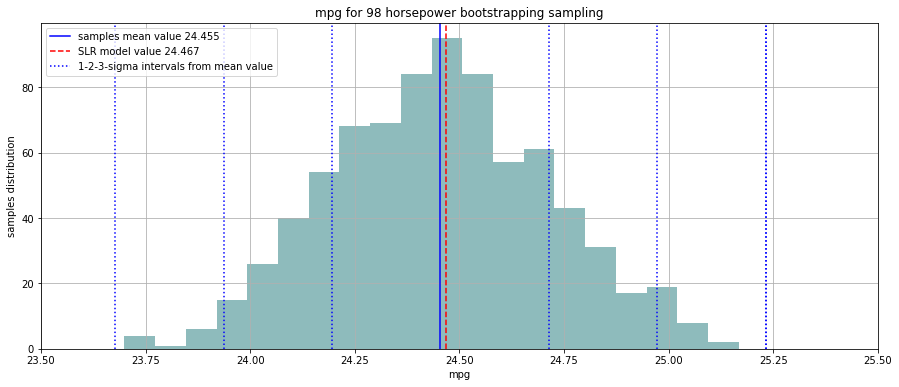

In [9]:
mpg_sampling = []
for sam in range(len(SLR_stat_df_samples)):
    beta_0 = SLR_stat_df_samples.loc[sam,'intercept']
    beta_1 = SLR_stat_df_samples.loc[sam,'slope']
    mpg_sampling.append(beta_0+beta_1*98)

plt.figure(figsize=(15,6))
plt.hist(mpg_sampling, bins=20, color='cadetblue', alpha=0.7)
plt.axvline(x=np.mean(mpg_sampling), 
            color='blue', alpha=1,
            label='samples mean value '+str(round(np.mean(mpg_sampling),3) ) )
plt.axvline(x=SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98, 
            color='red', alpha=1, linestyle='dashed',
            label='SLR model value '+str(round(SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98,3) ) )
for i in (1,2,3):
    plt.axvline(x=np.mean(mpg_sampling)-i*np.std(mpg_sampling), color='blue', linestyle='dotted')
    plt.axvline(x=np.mean(mpg_sampling)+i*np.std(mpg_sampling), color='blue', linestyle='dotted')
plt.axvline(x=np.mean(mpg_sampling)+i*np.std(mpg_sampling), color='blue', linestyle='dotted',
           label='1-2-3-sigma intervals from mean value')

plt.xlim(23.5,25.5)
plt.xlabel('mpg')
plt.ylabel('samples distribution')
plt.title('mpg for 98 horsepower bootstrapping sampling')
plt.grid()
plt.legend()
plt.show()

In [10]:
print('95% confidence interval for f(x) part of prediction: [', 
      round(SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98 - np.std(mpg_sampling)*math.sqrt(2),2), ' , ',
      round(SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98 + np.std(mpg_sampling)*math.sqrt(2),2), ']' )
# std is devided by sqrt(2) - as SLM regression was done on full dataset, while bootstrapping sampling used ony one-half 

95% confidence interval for f(x) part of prediction: [ 24.1  ,  24.83 ]


## prediction interval

In [11]:
print('Stochastical part of variance:', mean_squared_error(Y, SLR_model_obj.predict(X)) )

print('Biased part of variance:',  math.pow(np.std(mpg_sampling)*math.sqrt(2),2))

std_prediction = math.sqrt(mean_squared_error(Y, SLR_model_obj.predict(X))+math.pow(np.std(mpg_sampling)*math.sqrt(2),2))

print('95% prediction interval for mpg: [', 
      round(SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98 - std_prediction*2,2), ' , ',
      round(SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98 + std_prediction*2,2), ']' )

Stochastical part of variance: 23.943662938603108
Biased part of variance: 0.13412944765856405
95% prediction interval for mpg: [ 14.65  ,  34.28 ]


### Conclusion: stochastical error makes main part of prediction error as compared to `f(x)`-bias error

# items b&c: overall graphics

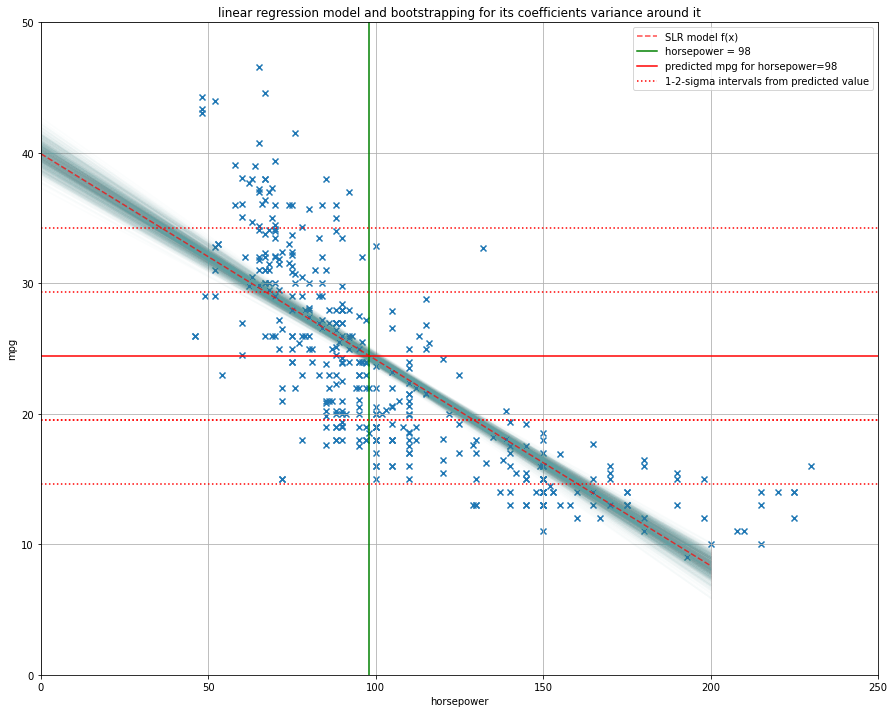

In [12]:
plt.figure(figsize=(15, 12))

for sam in range(len(SLR_stat_df_samples)):
    beta_0 = SLR_stat_df_samples.loc[sam,'intercept']
    beta_1 = SLR_stat_df_samples.loc[sam,'slope']
    
    plt.plot([0,200],[beta_0, beta_0+beta_1*200], color='cadetblue', alpha=0.02)
    
plt.plot([0,200],[SLR_model_obj.intercept_, SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*200], 
         color='red', alpha=0.7, linestyle='dashed', label='SLR model f(x)')

plt.scatter(list(df['horsepower']), list(df['mpg']), marker='x' )
plt.axvline(x=98, color='green', label='horsepower = 98')

plt.axhline(y=SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98, color='red', label='predicted mpg for horsepower=98')
for i in (1,2):
    plt.axhline(y=SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98-i*std_prediction, color='red', linestyle='dotted')
    plt.axhline(y=SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98+i*std_prediction, color='red', linestyle='dotted')

plt.axhline(y=SLR_model_obj.intercept_+SLR_model_obj.coef_[0]*98-std_prediction, color='red', linestyle='dotted',
           label='1-2-sigma intervals from predicted value')

plt.ylim(0,50)
plt.xlim(0,250)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('linear regression model and bootstrapping for its coefficients variance around it')
plt.grid()
plt.legend()
plt.show()

# Facultative: looks like parabola could have approximated the `f(x)` better - let's have a look
We have seen before that bias error is neglectable with respect to stochastical error, so we disregard it in prediction interval (and std) below

In [13]:
XX = np.array(
    pd.DataFrame({
        'x' :list(df['horsepower']),
        'xx':list(df['horsepower'].map(lambda x: x*x))
    })
)
Y = np.array(df['mpg'])

QuadroR_model_obj = linear_model.LinearRegression() # creating model object
QuadroR_model_obj.fit(XX,Y)

LinearRegression()

In [14]:
q_beta_0 = QuadroR_model_obj.intercept_
q_beta_1 = QuadroR_model_obj.coef_[0]
q_beta_2 = QuadroR_model_obj.coef_[1]


print('\nParabolic approximation function:')
print('<mpg> =', q_beta_0 , sign_str(q_beta_1), abs(q_beta_1), '* <horsepower>',
      sign_str(q_beta_2), abs(q_beta_2), '* <horsepower>^2')

def q_mpg_f(power):
    return q_beta_0 + q_beta_1 * power + q_beta_2 * power*power

print('\nMean squared error:', mean_squared_error(Y, QuadroR_model_obj.predict(XX)), '\n' )

print('Coefficient of determination - R^2 statistics (variant 1):', QuadroR_model_obj.score(XX,Y) )
print('Coefficient of determination - R^2 statistics (variant 2):', r2_score(Y, QuadroR_model_obj.predict(XX)) )

q_std = math.sqrt(mean_squared_error(Y, QuadroR_model_obj.predict(XX)))

print('\n mpg prediction for 98 horsepowers is:   ', round(q_mpg_f(98),1), '+/-', round(q_std,1), 
      '   - this is how it would be normally written by a physisist!')


Parabolic approximation function:
<mpg> = 56.90009970211297 - 0.46618962994735275 * <horsepower> + 0.0012305361007739146 * <horsepower>^2

Mean squared error: 18.98476890761722 

Coefficient of determination - R^2 statistics (variant 1): 0.6875590305127516
Coefficient of determination - R^2 statistics (variant 2): 0.6875590305127516

 mpg prediction for 98 horsepowers is:    23.0 +/- 4.4    - this is how it would be normally written by a physisist!


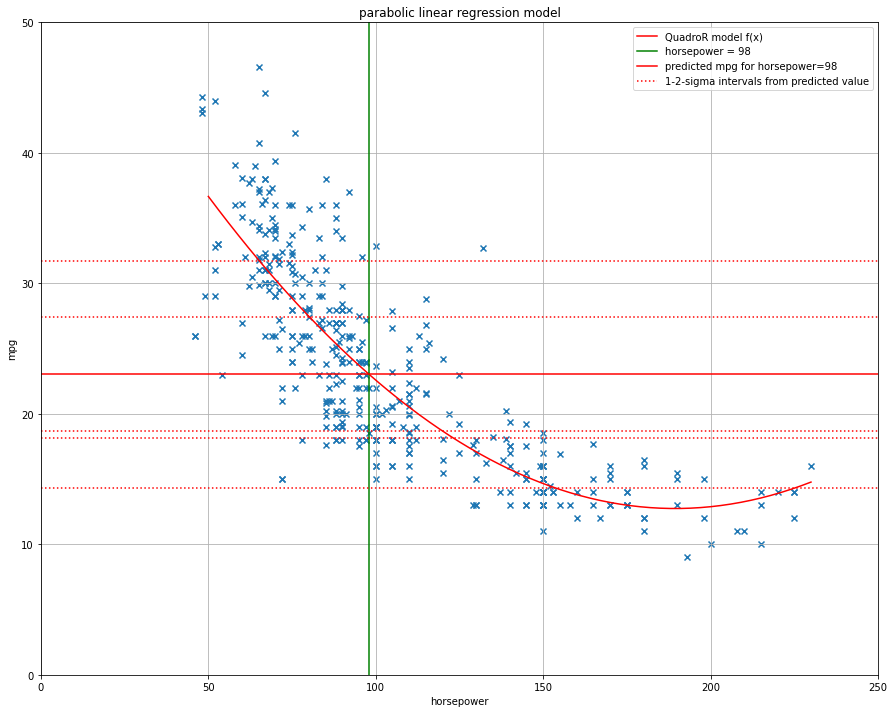

In [15]:
plt.figure(figsize=(15, 12))


plt.plot([i for i in range(50,231)],[q_mpg_f(i) for i in range(50,231)], 
         color='red', label='QuadroR model f(x)')

plt.scatter(list(df['horsepower']), list(df['mpg']), marker='x' )
plt.axvline(x=98, color='green', label='horsepower = 98')

plt.axhline(y=q_mpg_f(98), color='red', label='predicted mpg for horsepower=98')
for i in (1,2):
    plt.axhline(y=q_mpg_f(98)-i*q_std, color='red', linestyle='dotted')
    plt.axhline(y=q_mpg_f(98)+i*q_std, color='red', linestyle='dotted')

plt.axhline(y=q_mpg_f(98)-std_prediction, color='red', linestyle='dotted',
           label='1-2-sigma intervals from predicted value')

plt.ylim(0,50)
plt.xlim(0,250)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('parabolic linear regression model')
plt.grid()
plt.legend()
plt.show()

## predictions comparison between linear and parabolic approximation of `f(x)`

In [16]:
show_df = pd.DataFrame()
show_df['mpg_predicted'] = [mpg_f(98), q_mpg_f(98)]
show_df['std_prediction'] = [std_prediction, q_std]
show_df['R^2 statistics_%'] = [SLR_model_obj.score(X,Y)*100, QuadroR_model_obj.score(XX,Y)*100]
show_df['left_prediction_int95%'] = [mpg_f(98)-2*std_prediction, q_mpg_f(98)-2*q_std]
show_df['right_prediction_int95%'] = [mpg_f(98)+2*std_prediction, q_mpg_f(98)+2*q_std]
show_df.index = ['linear', 'parabolic']

round(show_df,1)

,mpg_predicted,std_prediction,R^2 statistics_%,left_prediction_int95%,right_prediction_int95%
linear,24.5,4.9,60.6,14.7,34.3
parabolic,23.0,4.4,68.8,14.3,31.7


### Conclusion: prediction intervals are not fully included one into another, so in addition to better precision in parabolic case, we have corrected linearity bias of `f(x)` approximation